In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
from matplotlib import pyplot as plt

In [3]:
from pathlib import Path

label_cols = [
    'id',
    'Product ID',
    'Type'
]

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]

target_col = 'Machine failure'

data_csv = Path('data/train.csv')
data_df = pd.read_csv(data_csv, index_col=label_cols).astype('float32')

In [8]:
display(data_df.size)
display(data_df.index)
display(data_df.columns)
display(data_df.dtypes)

data_df.info()

1500719

MultiIndex([(     0, 'L50096', 'L'),
            (     1, 'M20343', 'M'),
            (     2, 'L49454', 'L'),
            (     3, 'L53355', 'L'),
            (     4, 'M24050', 'M'),
            (     5, 'M24300', 'M'),
            (     6, 'L56736', 'L'),
            (     7, 'L55488', 'L'),
            (     8, 'L56397', 'L'),
            (     9, 'L55067', 'L'),
            ...
            (136419, 'M21064', 'M'),
            (136420, 'L56888', 'L'),
            (136421, 'L56507', 'L'),
            (136422, 'L51411', 'L'),
            (136423, 'M17346', 'M'),
            (136424, 'M22284', 'M'),
            (136425, 'H38017', 'H'),
            (136426, 'L54690', 'L'),
            (136427, 'L53876', 'L'),
            (136428, 'L47937', 'L')],
           names=['id', 'Product ID', 'Type'], length=136429)

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Air temperature [K]        float32
Process temperature [K]    float32
Rotational speed [rpm]     float32
Torque [Nm]                float32
Tool wear [min]            float32
Machine failure            float32
TWF                        float32
HDF                        float32
PWF                        float32
OSF                        float32
RNF                        float32
dtype: object

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 136429 entries, (0, 'L50096', 'L') to (136428, 'L47937', 'L')
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Air temperature [K]      136429 non-null  float32
 1   Process temperature [K]  136429 non-null  float32
 2   Rotational speed [rpm]   136429 non-null  float32
 3   Torque [Nm]              136429 non-null  float32
 4   Tool wear [min]          136429 non-null  float32
 5   Machine failure          136429 non-null  float32
 6   TWF                      136429 non-null  float32
 7   HDF                      136429 non-null  float32
 8   PWF                      136429 non-null  float32
 9   OSF                      136429 non-null  float32
 10  RNF                      136429 non-null  float32
dtypes: float32(11)
memory usage: 12.0+ MB


In [9]:
pd.options.display.float_format = '{:.3f}'.format
data_df.head()

,,,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,Product ID,Type,,,,,,,,,,,
0,L50096,L,300.600,309.600,1596.000,36.100,140.000,0.000,0.000,0.000,0.000,0.000,0.000
1,M20343,M,302.600,312.100,1759.000,29.100,200.000,0.000,0.000,0.000,0.000,0.000,0.000
2,L49454,L,299.300,308.500,1805.000,26.500,25.000,0.000,0.000,0.000,0.000,0.000,0.000
3,L53355,L,301.000,310.900,1524.000,44.300,197.000,0.000,0.000,0.000,0.000,0.000,0.000
4,M24050,M,298.000,309.000,1641.000,35.400,34.000,0.000,0.000,0.000,0.000,0.000,0.000


In [10]:
data_df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000
mean,299.863,309.941,1520.331,40.349,104.409,0.016,0.002,0.005,0.002,0.004,0.002
std,1.862,1.385,138.737,8.502,63.965,0.124,0.039,0.072,0.049,0.063,0.047
min,295.300,305.800,1181.000,3.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,298.300,308.700,1432.000,34.600,48.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,300.000,310.000,1493.000,40.400,106.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,301.200,310.900,1580.000,46.100,159.000,0.000,0.000,0.000,0.000,0.000,0.000
max,304.400,313.800,2886.000,76.600,253.000,1.000,1.000,1.000,1.000,1.000,1.000


In [11]:
data_df.head().style.background_gradient('Blues').format(precision=3)

,,,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,Product ID,Type,,,,,,,,,,,
0,L50096,L,300.600,309.600,1596.000,36.100,140.000,0.000,0.000,0.000,0.000,0.000,0.000
1,M20343,M,302.600,312.100,1759.000,29.100,200.000,0.000,0.000,0.000,0.000,0.000,0.000
2,L49454,L,299.300,308.500,1805.000,26.500,25.000,0.000,0.000,0.000,0.000,0.000,0.000
3,L53355,L,301.000,310.900,1524.000,44.300,197.000,0.000,0.000,0.000,0.000,0.000,0.000
4,M24050,M,298.000,309.000,1641.000,35.400,34.000,0.000,0.000,0.000,0.000,0.000,0.000


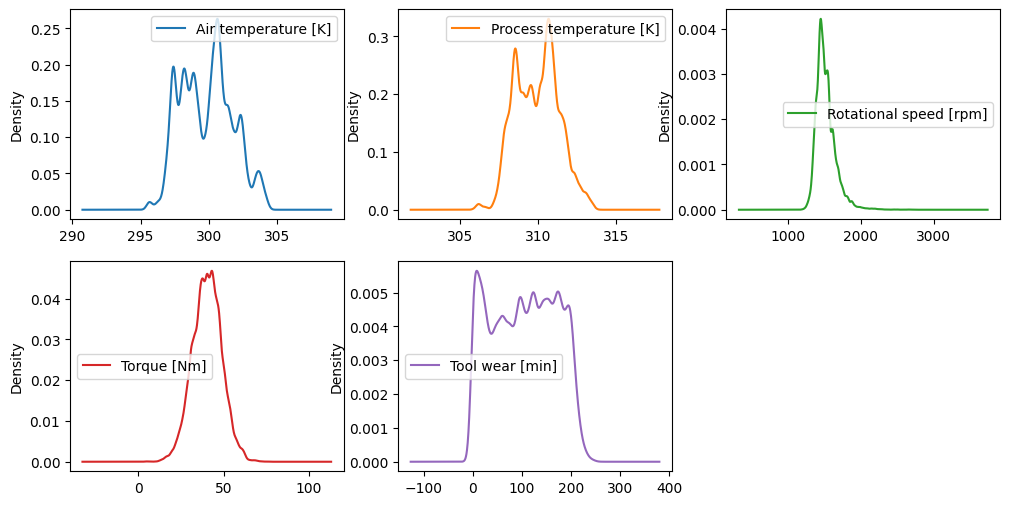

In [25]:
data_df[num_cols].plot.kde(sharex=False, subplots=True, layout=(2, 3), figsize=(12, 6))
plt.show()

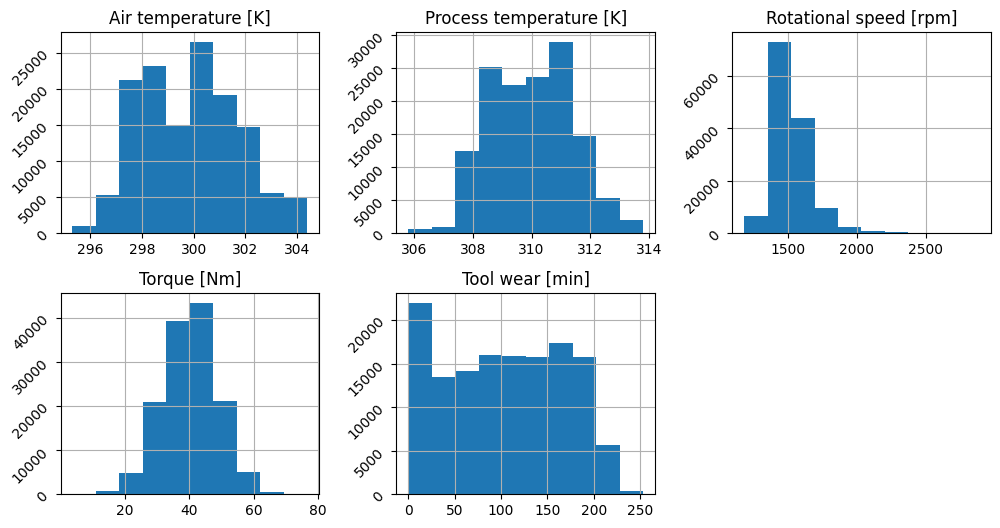

In [23]:
data_df[num_cols].hist(yrot=45, layout=(2, 3), figsize=(12, 6))
plt.show()

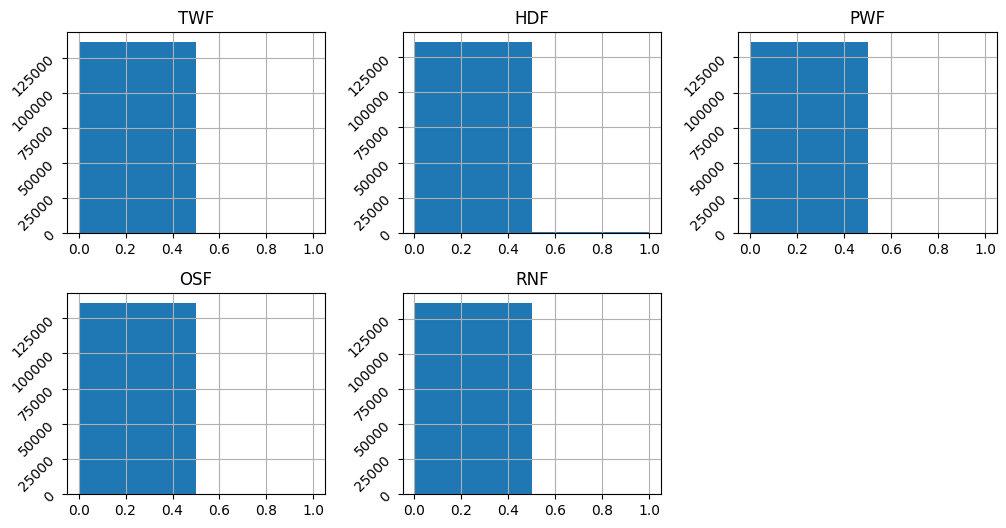

In [24]:
data_df[binary_cols].hist(bins=2, yrot=45, layout=(2, 3), figsize=(12, 6))
plt.show()

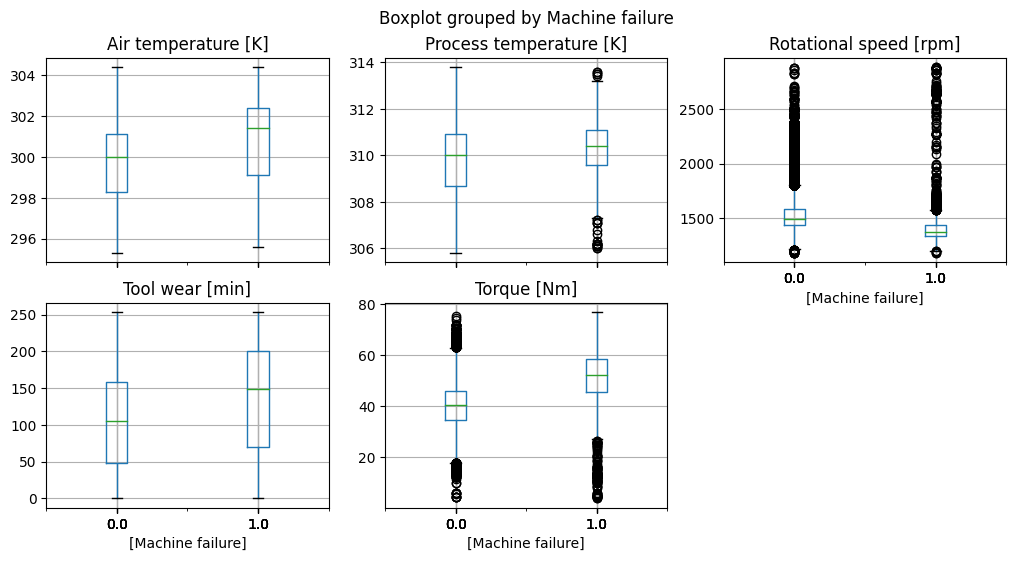

In [50]:
data_df.drop(columns=binary_cols).boxplot(by=target_col, sharey=False, layout=(2, 3), figsize=(12, 6))
plt.show()

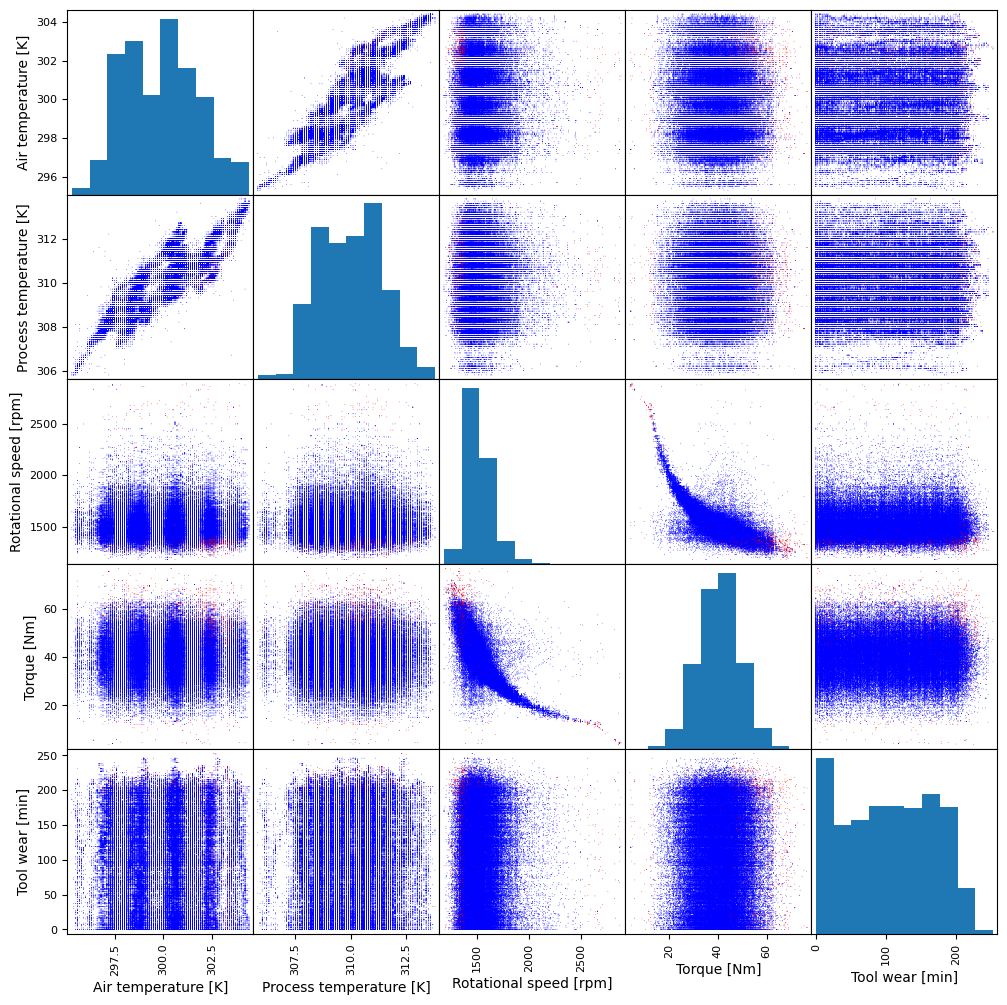

In [75]:
pd.plotting.scatter_matrix(data_df[num_cols], 1, (12, 12), s=1, c=data_df[target_col], cmap='bwr')
plt.show()

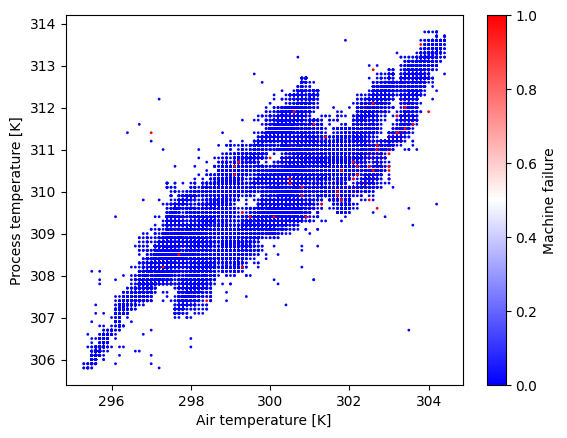

In [72]:
data_df.plot.scatter(num_cols[0], num_cols[1], 1, target_col, cmap='bwr')
plt.show()

In [128]:
from sklearn.preprocessing import StandardScaler

x = data_df[num_cols+binary_cols].to_numpy()
y = data_df[target_col].to_numpy()

std_scalar = StandardScaler().fit(x)
x = std_scalar.transform(x)

pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000,136429.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.450,-2.990,-2.446,-4.299,-1.632,-0.039,-0.072,-0.049,-0.063,-0.048
25%,-0.839,-0.896,-0.637,-0.676,-0.882,-0.039,-0.072,-0.049,-0.063,-0.048
50%,0.074,0.043,-0.197,0.006,0.025,-0.039,-0.072,-0.049,-0.063,-0.048
75%,0.718,0.692,0.430,0.676,0.853,-0.039,-0.072,-0.049,-0.063,-0.048
max,2.436,2.786,9.844,4.264,2.323,25.348,13.885,20.401,15.863,21.023


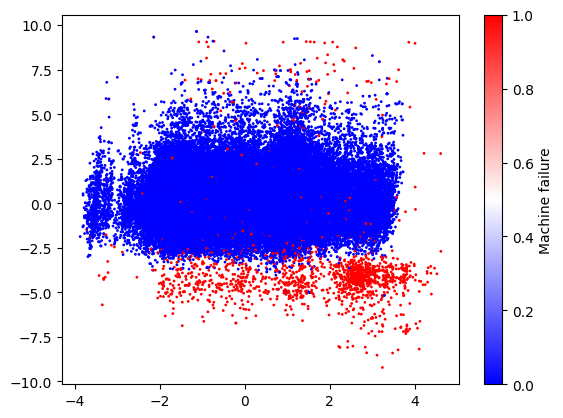

In [160]:
from sklearn.decomposition import PCA

pca = PCA(2).fit(x)
x_pca = pca.transform(x)

plt.scatter(*x_pca.T, 1, y, cmap='bwr')
plt.colorbar(label=target_col)
xlim = plt.xlim()
ylim = plt.ylim()
plt.show()

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

loss 0.0214271124209905


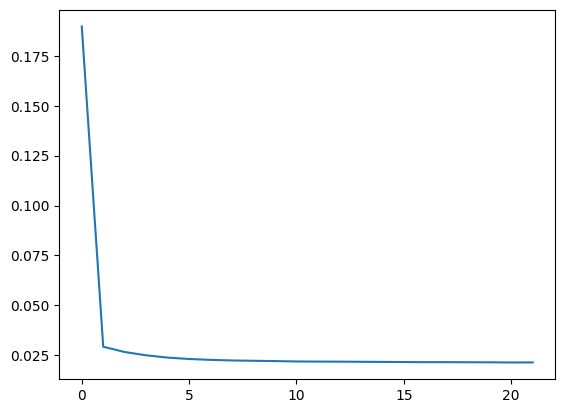

In [191]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier((16, 16)).fit(x_train, y_train)

print('loss', mlp.loss_)

plt.plot(mlp.loss_curve_)
plt.show()

In [192]:
mlp.score(x_test, y_test)

0.9962765333646065

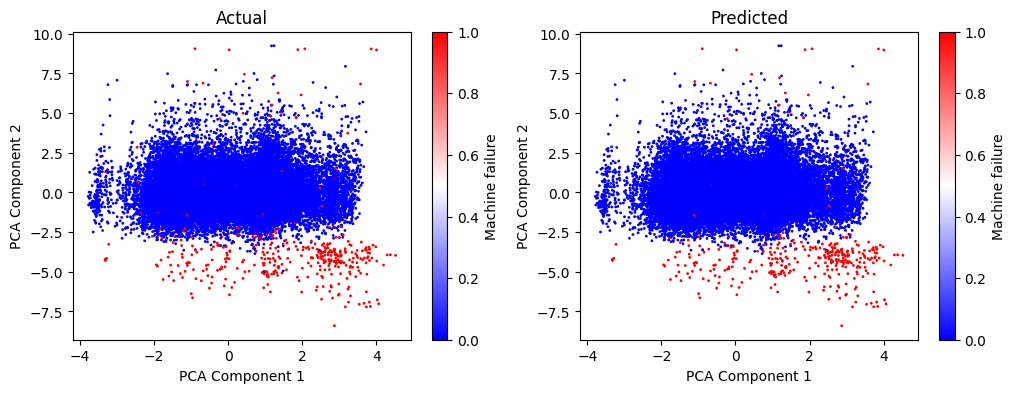

In [152]:
y_preds = mlp.predict(x_test)
x_pca = pca.transform(x_test)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

scatter0 = ax0.scatter(*x_pca.T, 1, y_test, cmap='bwr')
ax0.set_xlabel('PCA Component 1')
ax0.set_ylabel('PCA Component 2')
ax0.set_title('Actual')
fig.colorbar(scatter0, ax=ax0, label=target_col)

scatter1 = ax1.scatter(*x_pca.T, 1, y_preds, cmap='bwr')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('Predicted')
fig.colorbar(scatter1, ax=ax1, label=target_col)

plt.show()

In [193]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression().fit(x_train, y_train)
y_preds = logit.predict(x_test)
logit.score(x_test, y_test)

0.9963351706344553

In [194]:
from sklearn.svm import LinearSVC

svc = LinearSVC(dual='auto').fit(x_train, y_train)
y_preds = svc.predict(x_test)
svc.score(x_test, y_test)

0.9963351706344553

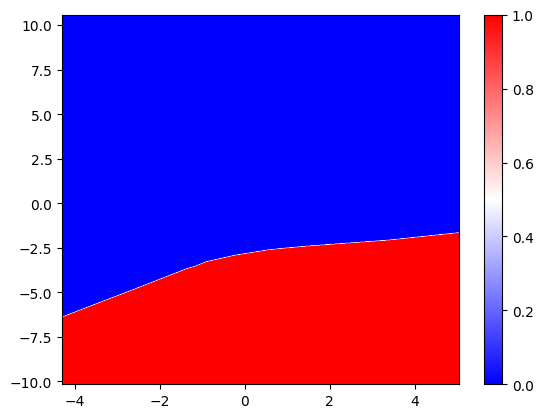

In [196]:
n = 1000
mesh = np.dstack(
    np.meshgrid(
        np.linspace(*xlim, n),
        np.linspace(*ylim, n),
        indexing='xy'
    )
).reshape(n * n, 2)

mesh = pca.inverse_transform(mesh)
mesh_preds = mlp.predict(mesh).reshape(n, n)

plt.imshow(mesh_preds, 'bwr', aspect='auto', interpolation='bilinear', extent=xlim+ylim, origin='lower')
plt.colorbar()
plt.show()